In [246]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [247]:
digits = datasets.load_digits()

# Description

In [248]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Feature Columns

In [249]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [250]:
digits.data.shape, digits.images.shape

((1797, 64), (1797, 8, 8))

# Show Digit images

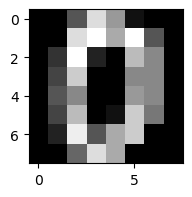

In [251]:
img = digits.images[0]
plt.figure(figsize=(2,2))
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

# Train Test

ต้องแปลง 1 แถว 8 columns 8 มิติ (3D) เป็น 2D โดยแปลง 1 Row 64 Columns </br>
[0.,  0.,  5., 13.,  9.,  1.,  0.,  0., 0.,  0., 13., 15., 10., 15.,  5.,  0.,....,0.,  0.,  6., 13., 10.,  0.,  0.,  0.]

In [252]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [253]:
n_samples = digits.images.shape[0]

In [254]:
X = digits.images.reshape(n_samples,-1)
y = digits.target
X.shape, digits.target.shape

((1797, 64), (1797,))

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [257]:
from sklearn.neural_network import MLPClassifier

# MLP

In [258]:
mlpc = MLPClassifier(hidden_layer_sizes=(208,208),max_iter=1000,alpha=1e-10,solver='sgd',random_state=42,activation='tanh')
mlpc.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=1e-10, hidden_layer_sizes=(208, 208),
              max_iter=1000, random_state=42, solver='sgd')

In [259]:
mlpc.score(X_test,y_test)

0.9819193324061196

# Performance

In [260]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [261]:
y_pre = mlpc.predict(X_test)

In [262]:
print(classification_report(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.99      0.97        72
           2       1.00      1.00      1.00        66
           3       0.99      0.99      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.96      0.98        83
           6       0.99      0.99      0.99        69
           7       1.00      0.99      0.99        71
           8       0.95      0.94      0.95        65
           9       0.96      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0  1  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 80  1  0  0  2]
 [ 0  0  0  0  1  0 68  0  0  0]
 [ 0  0  0

# See Wrong Prediction

In [263]:
id_miss = np.where(y_test!= y_pre) #index that missing

In [264]:
d = {'predict':y_pre[id_miss],'actual':y_test[id_miss]}

In [265]:
pd.DataFrame(data=d)

,predict,actual
0,9,7
1,8,9
2,1,8
3,9,5
4,5,8
5,4,6
6,6,5
7,8,3
8,8,1
9,3,9


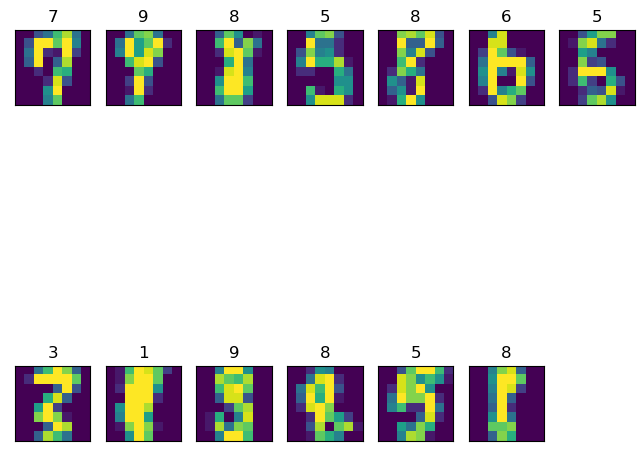

In [266]:
fig = plt.figure(figsize=(8,8))
for j,k in enumerate(id_miss[0]):
    plt.subplot(2,7,j+1)
    plt.imshow(X_test[k].reshape(8,8))
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Cross Validation

In [267]:
from sklearn.model_selection import RandomizedSearchCV

In [268]:
param = {
    'activation':['identity','logistic','tanh','relu'],
    'solver' :['lbfgs','sgd','adam'],
    'alpha':[1e-5,1e-7,1e-9],
    'learning_rate_init':[1e-5,1e-7,1e-9],
    'max_iter':[500],
    'shuffle':[True,False],
    'random_state':[42],
    'warm_start':[True,False],
    'nesterovs_momentum':[True,False],
    'early_stopping':[True,False],
    'learning_rate':['invscaling','constant','adaptive'],
    'hidden_layer_sizes':[(208,208),(11,11,11),(52,52),(5,2,1)]

}

In [269]:
gsv = RandomizedSearchCV(MLPClassifier(),param,verbose=1,cv=5,n_jobs=-1)
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [1e-05, 1e-07, 1e-09],
                                        'early_stopping': [True, False],
                                        'hidden_layer_sizes': [(208, 208),
                                                               (11, 11, 11),
                                                               (52, 52),
                                                               (5, 2, 1)],
                                        'learning_rate': ['invscaling',
                                                          'constant',
                                                          'adaptive'],
                                        'learning_rate_init': [1e-05, 1e-07,
                                                   

In [270]:
y_pre = gsv.predict(X_test)
print(classification_report(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.95      0.97      0.96        72
           2       0.94      1.00      0.97        66
           3       0.99      0.94      0.96        71
           4       1.00      1.00      1.00        78
           5       0.94      0.96      0.95        83
           6       1.00      0.97      0.99        69
           7       0.99      0.99      0.99        71
           8       0.98      0.92      0.95        65
           9       0.96      0.99      0.97        77

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.97       719
weighted avg       0.97      0.97      0.97       719

[[66  0  0  0  0  1  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  0  1]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  1 67  0  1  0  1  0  1]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  1  1  0  0 80  0  0  1  0]
 [ 0  0  0  0  0  2 67  0  0  0]
 [ 0  0  0

# Test Own Data

In [314]:
from PIL import Image,ImageOps

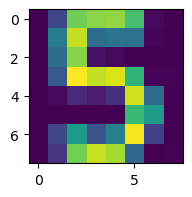

Predict digits is  5


In [419]:
my_images = '5-6.png'
my_label_y = [5]

fname = 'images/'+my_images
img = Image.open(fname).convert('L')
img = ImageOps.invert(img)
img = img.resize((8,8),Image.ANTIALIAS)
pixel = np.array(img)/255*16
pixel = pixel.astype('int')
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()
my_digit = pixel.reshape(1,-1)
print("Predict digits is ",gsv.predict(my_digit)[0])